In [35]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [36]:
df_info = pd.read_csv('./data/기업정보요약.csv')
df_info.head()
# df_info['전화번호'].unique().tolist()

,Unnamed: 0,사업자등록번호,데이터수집일자,기업명,대표자명,전화번호,팩스전화번호,우편번호,주소,상세주소,기업형태,기업규모,공기업구분,산업분류코드,산업분류코드설명,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
0,0,1068101837,20211228,(주)세***,박**,02-6226-9900,02-6226-9920,4799.0,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,내부 통신배선 공사업,I,20221104,NaN,NaN
1,1,2148601823,20211228,(주)포***,송**,02-2113-9400,02-2113-9494,8501.0,서울특별시 금천구 가산디지털2로 184,"1308호 (가산동,벽산디지털밸리2차)",외감,중소기업,일반기업,46522.0,통신·방송장비 및 부품 도매업,I,20221104,NaN,NaN
2,2,8308707172,20211228,(주)이***,이**,032-719-4881,032-719-4946,21558.0,인천 남동구 인주대로 585,"8층 801호 (구월동,한국씨티은행)",일반,중소기업,일반기업,58222.0,응용 소프트웨어 개발 및 공급업,I,20221104,NaN,NaN
3,3,1208104404,20211228,한솔피엔에스***,강**,02 22050305,02 22050505,4557.0,서울특별시 중구 퇴계로 213,"5층 (충무로4가,일흥빌딩)",거래소상장,중견기업,일반기업,46799.0,그 외 기타 상품 전문 도매업,I,20221104,NaN,NaN
4,4,8580704454,20211228,신**,신**,NaN,NaN,44217.0,울산 북구 약수9길,"20, 610호 (중산동,이화제일아파트)",일반,중소기업,일반기업,42491.0,"미장, 타일 및 방수 공사업",I,20221104,NaN,NaN


In [37]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9755 entries, 0 to 9754
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9755 non-null   int64  
 1   사업자등록번호     9755 non-null   int64  
 2   데이터수집일자     9755 non-null   int64  
 3   기업명         9755 non-null   object 
 4   대표자명        9755 non-null   object 
 5   전화번호        9240 non-null   object 
 6   팩스전화번호      7014 non-null   object 
 7   우편번호        7894 non-null   float64
 8   주소          9657 non-null   object 
 9   상세주소        8028 non-null   object 
 10  기업형태        9755 non-null   object 
 11  기업규모        9755 non-null   object 
 12  공기업구분       8134 non-null   object 
 13  산업분류코드      9736 non-null   float64
 14  산업분류코드설명    9733 non-null   object 
 15  작업구분코드      9755 non-null   object 
 16  데이터생성일자     9755 non-null   int64  
 17  연계처리상태코드    0 non-null      float64
 18  연계처리일자      0 non-null      float64
dtypes: float64(4), int64(4), ob

In [38]:
df_info.isnull().sum()

Unnamed: 0       0
사업자등록번호          0
데이터수집일자          0
기업명              0
대표자명             0
전화번호           515
팩스전화번호        2741
우편번호          1861
주소              98
상세주소          1727
기업형태             0
기업규모             0
공기업구분         1621
산업분류코드          19
산업분류코드설명        22
작업구분코드           0
데이터생성일자          0
연계처리상태코드      9755
연계처리일자        9755
dtype: int64

In [39]:
df_info['산업분류코드설명'].value_counts().index.tolist()

['일반 통신 공사업',
 '컴퓨터 프로그래밍 서비스업',
 '컴퓨터시스템 통합 자문 및 구축 서비스업',
 '응용 소프트웨어 개발 및 공급업',
 '통신 공사업',
 '기타 토목 시설물 건설업',
 '토목시설물 건설업',
 '시스템 소프트웨어 개발 및 공급업',
 '통신·방송장비 및 부품 도매업',
 '내부 통신배선 공사업',
 '기타 정보기술 및 컴퓨터 운영 관련 서비스업',
 '시스템ㆍ응용 소프트웨어 개발 및 공급업',
 '일반전기 공사업',
 '유선 통신장비 제조업',
 '종합 건설업',
 '소프트웨어 개발 및 공급업',
 '전기 공사업',
 '배관 및 냉ㆍ난방 공사업',
 '컴퓨터시스템 통합 자문, 구축 및 관리업',
 '도배, 실내 장식 및 내장 목공사업',
 '콘크리트 및 철근 공사업',
 '통신기기 소매업',
 '단독 주택 건설업',
 '컴퓨터 및 주변장치, 소프트웨어 도매업',
 '광고 대행업',
 '유리 및 창호 공사업',
 '토공사업',
 '데이터베이스 및 온라인정보 제공업',
 '기타 무선 통신장비 제조업',
 '사무·상업용 및 공공기관용 건물 건설업',
 '그 외 기타 정보 서비스업',
 '포털 및 기타 인터넷 정보 매개 서비스업',
 '비주거용 건물 건설업',
 '건물 건설업',
 '기타 통신 판매업',
 '토목 건설업',
 '소방시설 공사업',
 '건물용 기계·장비 설치 공사업',
 '전자상거래 소매 중개업',
 '건물설비 설치 공사업',
 '전기 및 통신 공사업',
 '주거용 건물 건설업',
 '미장, 타일 및 방수 공사업',
 '산업생산시설 종합건설업',
 '경영컨설팅업',
 '시설물 축조 관련 전문공사업',
 '기타 건물 관련설비 설치 공사업',
 '실내건축 및 건축마무리 공사업',
 '방송 프로그램 제작업',
 '전시, 컨벤션 및 행사 대행업',
 '건물 및 구축물 해체 공사업',
 '광고 영화 및 비디오물 제작업',
 '방송 및 무선 통신장비 제조업',
 '일반 서적 출판업',
 '그 외 기타 협회 및 단체',
 '시설물 유

In [40]:
# 온라인뉴스 데이터
df_news = pd.read_csv('./data/온라인뉴스.csv')
df_news.columns.tolist()
df_news2 = df_news.dropna(subset='기사내용')
df_news2

,사업자등록번호,순번,데이터수집일자,언론사명,기사날짜,기사제목,기사내용,기자명,URL링크,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
7311,1238802655,3,20220106.0,여성소비자신문,20190426.0,"현대차, 페루 현지 저소득층 청년 자립 지원",[여성소비자신문 이지은 기자] 현대차가 페루에서 자동차 정비기술 교육을 통해 청년들...,NaN,NaN,I,20221104,NaN,NaN
7312,1238802655,4,20220106.0,팍스넷뉴스,20190425.0,"[비즈+] 한국지엠재단, 범죄 피해자 지원 ‘민·관 협력체계’ 구축 外","◆한국지엠재단, 범죄 피해자 지원 위해 민·관 협력체계 구축[팍스넷뉴스 정혜인, 권...",NaN,NaN,I,20221104,NaN,NaN
7313,1238802655,5,20220106.0,동아일보,20171102.0,“제 사이즈는 3114” 미인대회 참가 女의 자기 소개…뭔 소리?,사진=미스 페루 선발대회 공식 인스타그램\n“제 사이즈는 3114입니다.”\n\n지...,NaN,NaN,I,20221104,NaN,NaN
7314,1238802655,6,20220106.0,연합뉴스,20120822.0,2012 페루 관광설명회,"(서울=연합뉴스) 페루정부관광청(PROMPERU)은 지난 21일 주요 여행사, 항공...",NaN,NaN,I,20221104,NaN,NaN
9171,1448103470,2,20220107.0,매일일보,20170605.0,"SK브로드밴드, 자회사 '홈앤서비스 설립'","[매일일보 이우열 기자] SK브로드밴드는 초고속인터넷, IPTV 설치/AS 등 대고...",NaN,NaN,I,20221104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222,7858509477,19,20220105.0,오피니언뉴스,20180701.0,2018 건설업체 상호협력 평가서 대우건설·성보건설 최고점,"올해 종합건설업체 간 상호협력 평가에서 대기업은 ㈜대우건설이 98점, 중소기업은 성...",NaN,NaN,I,20221104,NaN,NaN
18223,7858509477,20,20220105.0,한겨레,20170503.0,‘누구’에 말걸기 1억건 넘었다,에스케이텔레콤(SKT)은 음성인식 인공지능 기기 ‘누구’의 판매량이 10만대를 돌파...,NaN,NaN,I,20221104,NaN,NaN
18224,7858509477,21,20220105.0,SBSBiz,20151127.0,SBSCNBC 5STAR(5스타) 이승조 대표 11월 12일 투자 전략,▶ ‘5스타 (5STAR) 오늘장 투자전략’은 매일 아침 하나금융투자 ‘스마트하나H...,NaN,NaN,I,20221104,NaN,NaN
18225,7858509477,22,20220105.0,한겨레,20101201.0,돌아온 슈터…누가 웃을까,이제부터 진짜 승부다. 12일부터 27일까지 보름 동안 광저우아시아경기대회 휴식기를...,NaN,NaN,I,20221104,NaN,NaN


In [41]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18830 entries, 0 to 18829
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   18830 non-null  int64  
 1   순번        18830 non-null  int64  
 2   데이터수집일자   8830 non-null   float64
 3   언론사명      1931 non-null   object 
 4   기사날짜      1931 non-null   float64
 5   기사제목      1931 non-null   object 
 6   기사내용      67 non-null     object 
 7   기자명       0 non-null      float64
 8   URL링크     0 non-null      float64
 9   작업구분코드    18830 non-null  object 
 10  데이터생성일자   18830 non-null  int64  
 11  연계처리상태코드  0 non-null      float64
 12  연계처리일자    0 non-null      float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.9+ MB


In [42]:
df_news.isnull().sum()

사업자등록번호         0
순번              0
데이터수집일자     10000
언론사명        16899
기사날짜        16899
기사제목        16899
기사내용        18763
기자명         18830
URL링크       18830
작업구분코드          0
데이터생성일자         0
연계처리상태코드    18830
연계처리일자      18830
dtype: int64

In [43]:
df_news.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '언론사명', '기사날짜', '기사제목', '기사내용', '기자명',
       'URL링크', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [44]:
df_news2.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '언론사명', '기사날짜', '기사제목', '기사내용', '기자명',
       'URL링크', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [45]:
# 취업포탈리뷰 데이터
df_review = pd.read_csv('./data/취업포탈리뷰.csv')
df_review.head()

# df_review2 = df_review.dropna()

,Unnamed: 0,사업자등록번호,순번,데이터수집일자,직군명,직원여부분류명,댓글작성년월,종합점수,승진기회점수,복지및급여점수,...,취업사이트댓글제목,기업장점설명,기업단점설명,경영진요청사항설명,기업성장가능성설명,기업추천여부설명,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
0,0,2078102181,1,20210918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,20221104,NaN,NaN
1,1,3128106841,2,20210918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,20221104,NaN,NaN
2,2,1048100971,3,20210918,IT/인터넷,전직원,202109.0,60.0,60.0,40.0,...,"""최저 연봉으로 많은 일을 할 수 있는곳. 요즘 분위기 좋다고 하는데 매우 빡세다""",식당이 무제한이고 맛있다. 광화문에 있다. 체계가 확실히 잡혀 있다. 디지틀조선일보...,"보고를 위한 문서 작업이 많았고, 군대식 문화로 매우 수직적인 업무 구조 이다. 부...","위에 의사 결정자들이 이끌어 가는 회사구조가 맞지마, 위에 의사결정자들이 의사 결정...",비슷,이 기업을 추천하지 않습니다.,I,20221104,NaN,NaN
3,3,1048100971,4,20210918,IT/인터넷,전직원,202109.0,80.0,60.0,40.0,...,"""사람들좋고 여유롭게 업무가능햇던곳 급여빼고는 만족했던곳""",일만 잘한다면 다들 잘챙겨주시고 연구소가 제일 좋았던 느낌,눈치 없으면 힘들수도 사원대리가 별로 없다?정도? 부장님들이 많으심,연봉 인상좀 잘해주시고 대리 과장 급들 잘챙겨주세요 대리 과장급이 없는건 회사가 문...,비슷,이 기업을 추천 합니다!,I,20221104,NaN,NaN
4,4,1048100971,5,20210918,서비스/고객지원,전직원,202109.0,60.0,100.0,60.0,...,"""무난하고 욕심 없이 살고 맡은 일에 집중할 수 있음.""","1. 식사 점심 저녁을 회사에서 준다. 2. 작지만 다양한 복지혜택 (명절, 연말마...",1. 연봉이 타 기업보다 낮은편 그외에 딱히 단점은 없는 것 같다.,딱히 없는데 최소글자를 채워야 합니다.,비슷,이 기업을 추천 합니다!,I,20221104,NaN,NaN


In [46]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34447 entries, 0 to 34446
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  34447 non-null  int64  
 1   사업자등록번호     34447 non-null  int64  
 2   순번          34447 non-null  int64  
 3   데이터수집일자     34447 non-null  int64  
 4   직군명         16735 non-null  object 
 5   직원여부분류명     20673 non-null  object 
 6   댓글작성년월      18780 non-null  float64
 7   종합점수        20673 non-null  float64
 8   승진기회점수      20673 non-null  float64
 9   복지및급여점수     20673 non-null  float64
 10  업무생명균형점수    20673 non-null  float64
 11  기업문화점수      20673 non-null  float64
 12  경영진점수       20673 non-null  float64
 13  취업사이트댓글제목   20673 non-null  object 
 14  기업장점설명      20673 non-null  object 
 15  기업단점설명      20673 non-null  object 
 16  경영진요청사항설명   20673 non-null  object 
 17  기업성장가능성설명   13800 non-null  object 
 18  기업추천여부설명    18008 non-null  object 
 19  작업구분코드      34447 non-nul

In [47]:
df_review.isnull().sum()

Unnamed: 0        0
사업자등록번호           0
순번                0
데이터수집일자           0
직군명           17712
직원여부분류명       13774
댓글작성년월        15667
종합점수          13774
승진기회점수        13774
복지및급여점수       13774
업무생명균형점수      13774
기업문화점수        13774
경영진점수         13774
취업사이트댓글제목     13774
기업장점설명        13774
기업단점설명        13774
경영진요청사항설명     13774
기업성장가능성설명     20647
기업추천여부설명      16439
작업구분코드            0
데이터생성일자           0
연계처리상태코드      34447
연계처리일자        34447
dtype: int64

In [48]:
df_review.columns

Index(['Unnamed: 0', '사업자등록번호', '순번', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명', '작업구분코드',
       '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [49]:
df_review.columns.tolist()
df_review2 = df_review[['사업자등록번호', '데이터수집일자', '직군명', '직원여부분류명','댓글작성년월', '종합점수', '승진기회점수',
 '복지및급여점수','업무생명균형점수','기업문화점수','경영진점수',
 '취업사이트댓글제목','기업장점설명','기업단점설명','경영진요청사항설명',
 '기업성장가능성설명','기업추천여부설명']]
# df_review.isnull().sum()
df_review2 = df_review2.dropna(subset='취업사이트댓글제목')
df_review2.head()

,사업자등록번호,데이터수집일자,직군명,직원여부분류명,댓글작성년월,종합점수,승진기회점수,복지및급여점수,업무생명균형점수,기업문화점수,경영진점수,취업사이트댓글제목,기업장점설명,기업단점설명,경영진요청사항설명,기업성장가능성설명,기업추천여부설명
2,1048100971,20210918,IT/인터넷,전직원,202109.0,60.0,60.0,40.0,40.0,60.0,60.0,"""최저 연봉으로 많은 일을 할 수 있는곳. 요즘 분위기 좋다고 하는데 매우 빡세다""",식당이 무제한이고 맛있다. 광화문에 있다. 체계가 확실히 잡혀 있다. 디지틀조선일보...,"보고를 위한 문서 작업이 많았고, 군대식 문화로 매우 수직적인 업무 구조 이다. 부...","위에 의사 결정자들이 이끌어 가는 회사구조가 맞지마, 위에 의사결정자들이 의사 결정...",비슷,이 기업을 추천하지 않습니다.
3,1048100971,20210918,IT/인터넷,전직원,202109.0,80.0,60.0,40.0,80.0,80.0,40.0,"""사람들좋고 여유롭게 업무가능햇던곳 급여빼고는 만족했던곳""",일만 잘한다면 다들 잘챙겨주시고 연구소가 제일 좋았던 느낌,눈치 없으면 힘들수도 사원대리가 별로 없다?정도? 부장님들이 많으심,연봉 인상좀 잘해주시고 대리 과장 급들 잘챙겨주세요 대리 과장급이 없는건 회사가 문...,비슷,이 기업을 추천 합니다!
4,1048100971,20210918,서비스/고객지원,전직원,202109.0,60.0,100.0,60.0,100.0,40.0,40.0,"""무난하고 욕심 없이 살고 맡은 일에 집중할 수 있음.""","1. 식사 점심 저녁을 회사에서 준다. 2. 작지만 다양한 복지혜택 (명절, 연말마...",1. 연봉이 타 기업보다 낮은편 그외에 딱히 단점은 없는 것 같다.,딱히 없는데 최소글자를 채워야 합니다.,비슷,이 기업을 추천 합니다!
5,1048100971,20210918,미디어/홍보,전직원,202109.0,20.0,20.0,60.0,20.0,40.0,20.0,"""비효율적이고 불편하며 노후한 업무 시스템. 고인물들이 발전을 저해함.""",주기적인 성과금과 중식석식 무료제공. 광화문에 위치.,비효율의 끝판왕. 휴가 자유롭게 못씀. 아파서 결근하면 눈치줌.,고인물 제거 시급. 전반적인 시스템 개선이 필요합니다.,비슷,이 기업을 추천하지 않습니다.
6,1048100971,20210918,IT/인터넷,현직원,202108.0,80.0,40.0,80.0,100.0,80.0,60.0,"""팀마다 분위기가 다른 것 같으나, 대체로 괜찮은편 회사의 오래된 세월만큼이나 회사...","자유로운 연차, 구내 식당, 복지(휴가비, 실비 등), 자유로운 분위기, 칼퇴","부장급들이 많고 보수적인편이지만, 모두들 개선하려고 노력(현실은 어려울 듯) 오래된...",기존 사업에서 큰 변화가 없는 것 같습니다. 신규 사업 추진에 적극적이었으면 좋겠습니다.,비슷,이 기업을 추천 합니다!


In [50]:
df_info.head(3)

,Unnamed: 0,사업자등록번호,데이터수집일자,기업명,대표자명,전화번호,팩스전화번호,우편번호,주소,상세주소,기업형태,기업규모,공기업구분,산업분류코드,산업분류코드설명,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
0,0,1068101837,20211228,(주)세***,박**,02-6226-9900,02-6226-9920,4799.0,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,내부 통신배선 공사업,I,20221104,NaN,NaN
1,1,2148601823,20211228,(주)포***,송**,02-2113-9400,02-2113-9494,8501.0,서울특별시 금천구 가산디지털2로 184,"1308호 (가산동,벽산디지털밸리2차)",외감,중소기업,일반기업,46522.0,통신·방송장비 및 부품 도매업,I,20221104,NaN,NaN
2,2,8308707172,20211228,(주)이***,이**,032-719-4881,032-719-4946,21558.0,인천 남동구 인주대로 585,"8층 801호 (구월동,한국씨티은행)",일반,중소기업,일반기업,58222.0,응용 소프트웨어 개발 및 공급업,I,20221104,NaN,NaN


In [51]:
df_info2 = df_info[['사업자등록번호','기업명','전화번호','팩스전화번호','주소','상세주소',
 '기업형태','기업규모','공기업구분',
 '산업분류코드','산업분류코드설명']]

df_info2.head()

,사업자등록번호,기업명,전화번호,팩스전화번호,주소,상세주소,기업형태,기업규모,공기업구분,산업분류코드,산업분류코드설명
0,1068101837,(주)세***,02-6226-9900,02-6226-9920,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,내부 통신배선 공사업
1,2148601823,(주)포***,02-2113-9400,02-2113-9494,서울특별시 금천구 가산디지털2로 184,"1308호 (가산동,벽산디지털밸리2차)",외감,중소기업,일반기업,46522.0,통신·방송장비 및 부품 도매업
2,8308707172,(주)이***,032-719-4881,032-719-4946,인천 남동구 인주대로 585,"8층 801호 (구월동,한국씨티은행)",일반,중소기업,일반기업,58222.0,응용 소프트웨어 개발 및 공급업
3,1208104404,한솔피엔에스***,02 22050305,02 22050505,서울특별시 중구 퇴계로 213,"5층 (충무로4가,일흥빌딩)",거래소상장,중견기업,일반기업,46799.0,그 외 기타 상품 전문 도매업
4,8580704454,신**,NaN,NaN,울산 북구 약수9길,"20, 610호 (중산동,이화제일아파트)",일반,중소기업,일반기업,42491.0,"미장, 타일 및 방수 공사업"


In [52]:
df_info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9755 entries, 0 to 9754
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   9755 non-null   int64  
 1   기업명       9755 non-null   object 
 2   전화번호      9240 non-null   object 
 3   팩스전화번호    7014 non-null   object 
 4   주소        9657 non-null   object 
 5   상세주소      8028 non-null   object 
 6   기업형태      9755 non-null   object 
 7   기업규모      9755 non-null   object 
 8   공기업구분     8134 non-null   object 
 9   산업분류코드    9736 non-null   float64
 10  산업분류코드설명  9733 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 838.4+ KB


In [53]:
df_m = pd.merge(df_info2, df_review2, left_on='사업자등록번호', right_on='사업자등록번호', how='inner')
df_m.head()

,사업자등록번호,기업명,전화번호,팩스전화번호,주소,상세주소,기업형태,기업규모,공기업구분,산업분류코드,...,복지및급여점수,업무생명균형점수,기업문화점수,경영진점수,취업사이트댓글제목,기업장점설명,기업단점설명,경영진요청사항설명,기업성장가능성설명,기업추천여부설명
0,1068101837,(주)세***,02-6226-9900,02-6226-9920,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,...,40.0,60.0,60.0,60.0,"""신입일 때 일 배운다 생각하고 다니기 좋아요""",연차 편하게 쓸 수 있고 야근이 없고 퇴근시간에 눈치 안보여서 좋아요,"일이 적은 만큼 적은 급여, 음료 하나 없는 텅빈 탕비실",복지가 제대로 안된 느낌 커피머신 한개만 덩그러니 있는 탕비실은 좀 그럼,비슷,이 기업을 추천 합니다!
1,1068101837,(주)세***,02-6226-9900,02-6226-9920,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,...,40.0,20.0,80.0,60.0,"""가족회사의 고충을 단적으로 보여주는 예. 윗선은 대부분 친인척이다""",직원들 모두 정이 많다. 대부분이 친절하고 일하다 보면 재미있는 일들이 많이 있다.,직원들과의 사이는 좋지만 직원들과의 사이와는 별개로 업무관련해서는 비추천. 출근시간...,직원들에게 조금더 복지를 신경써주었으면 합니다. 인자한 모습은 좋지만 일적인 부분에...,비슷,이 기업을 추천하지 않습니다.
2,1068101837,(주)세***,02-6226-9900,02-6226-9920,서울 성동구 광나루로8길 31,406호~408호 (성수동2가),일반,중소기업,일반기업,42322.0,...,20.0,20.0,20.0,40.0,"""소수의 직원으로 매출유지하기에 바쁘고 군대식 문화가 강한 회사""",가족같은 분위기와 오래 버티면 정년까지 보장되는 것 같다. 하지만 매출에 대한 압박...,"공지와 다르게 출근시간이 1시간정도 빠르며, 매일 아침마다 영업실적에 대한 압박을 ...","가족 중심의 회사의 한계가 보이고 있으며, 지쳐쓰러져 가는 직원들을 억지로 일으켜 ...",비슷,이 기업을 추천하지 않습니다.
3,2148601823,(주)포***,02-2113-9400,02-2113-9494,서울특별시 금천구 가산디지털2로 184,"1308호 (가산동,벽산디지털밸리2차)",외감,중소기업,일반기업,46522.0,...,40.0,60.0,60.0,40.0,"""적응하면 근무환경은 괜찮은편이지만 하는일 대비 연봉수준이 만족스러운 편은 아님""",근무환경이 괜찮은 편이고 업무량이 일정하진않지만 현재 크거 부하가걸리는 수준은 아님,업무 수준대비 연봉이 높은 편은 아니라고 생각됩니다.,회사의 기본 연봉테이블이 있는것은 이해하지만 소속해있는 사이트의 계약형태및 업무수준...,비슷,이 기업을 추천하지 않습니다.
4,2148601823,(주)포***,02-2113-9400,02-2113-9494,서울특별시 금천구 가산디지털2로 184,"1308호 (가산동,벽산디지털밸리2차)",외감,중소기업,일반기업,46522.0,...,40.0,80.0,20.0,40.0,"""네트워크 및 PC 유지보수, 소프트웨어 개발 관련 업무를 하는 회사로 엘지유플러스...",연차사용이 수월하고 미사용 연차는 연초에 지급해줌. 특별한 일 없으면 칼퇴근 가능....,식비 미지원. 비효율적인 프로세스를 가지고 있음. 임원급은 직원들의 말을 귀담아 듣...,인사 관련 업무에 명확한 기준이 있었으면 함. 인사고과나 부서 내의 개인의 실적 등...,NaN,NaN


In [54]:
df_m[['산업분류코드설명', '산업분류코드']].value_counts().head(60)
# df_m['산업분류코드'].value_counts().head(40)

산업분류코드설명                  산업분류코드 
응용 소프트웨어 개발 및 공급업         58222.0    1979
컴퓨터시스템 통합 자문 및 구축 서비스업    62021.0    1739
컴퓨터 프로그래밍 서비스업            62010.0    1288
시스템 소프트웨어 개발 및 공급업        58221.0    1093
시스템ㆍ응용 소프트웨어 개발 및 공급업     58220.0     912
소프트웨어 개발 및 공급업            58200.0     546
통신 공사업                    42320.0     456
일반 통신 공사업                 42321.0     434
컴퓨터시스템 통합 자문, 구축 및 관리업    62020.0     403
기타 정보기술 및 컴퓨터 운영 관련 서비스업  62090.0     345
통신·방송장비 및 부품 도매업          46522.0     334
광고 대행업                    71310.0     312
포털 및 기타 인터넷 정보 매개 서비스업    63120.0     295
데이터베이스 및 온라인정보 제공업        63991.0     252
컴퓨터 및 주변장치, 소프트웨어 도매업     46510.0     236
내부 통신배선 공사업               42322.0     216
전자상거래 소매 중개업              47911.0     210
전시, 컨벤션 및 행사 대행업          75992.0     193
유선 통신장비 제조업               26410.0     176
도배, 실내 장식 및 내장 목공사업       42412.0     161
토목시설물 건설업                 41220.0     159
경영컨설팅업                    71531.0     149
전기 공사업                    42310.0     147


# 시각화

In [55]:
df_m_reviews = df_m.loc[df_m['산업분류코드설명'].isin(['정보서비스업', '도매 및 상품 중개업', '실내건축 및 건축마무리 공사업', '토목 건설업', '전기 공사업', '게임 소프트웨어 개발 및 공급업'])]
df_m_reviews['기업성장가능성설명'].value_counts()

비슷    155
성장     43
Name: 기업성장가능성설명, dtype: int64

In [56]:
df_m_reviews['기업명'].unique().tolist()
len(df_m_reviews['기업명'].unique().tolist())
df_m_reviews['사업자등록번호'].unique().tolist()
len(df_m_reviews['사업자등록번호'].unique().tolist())

for i, j in zip(df_m_reviews['사업자등록번호'].unique().tolist(), df_m_reviews['기업명'].unique().tolist()) :
    print(i, j)

3058109484 (자)보***
1218102500 (주)아***
4038103843 디오이앤씨***
3078109670 (자)원***
3138106717 (주)대성***
3018104409 (주)에이원종***
4128108553 (주)세진엔지***
1218102828 대일코리아***
1378107892 대일전기***
3178108025 (주)세명***
1058607935 지인전기통신***
3128108234 원광이앤지***
2018100108 (주)그***
6038106169 (주)대광***
1208100837 세안이엔씨***
2048109389 (주)동***
3128107342 범우이앤씨***
4168704914 비에스에이치에스***
4168105720 에스티엔지***
5048109686 (주)조***
1078605250 (주)서울부스***
2208801163 (주)터***
1378604958 (주)**
2108107240 샤인엔지니어링***
1018102876 세틀뱅크***
1148607177 (주)시***
2068103058 (주)고미건축***
6038106213 경성이엔씨***
2208107047 (주)신***
2028107046 삼광씨앤비***
4128103976 (주)에이***
1208104309 (주)다***
2128103240 (주)오엔***
3668606051 (유)강남에너***
1108109948 (주)씨엠디***
5088100272 진보기업***
4088109798 일우전력***
3128606817 (주)대한***
1088103136 토*
5878602511 에**
2118808436 에이티엔***


In [57]:
df_m_reviews['산업분류코드설명'].value_counts()

전기 공사업               147
실내건축 및 건축마무리 공사업      55
정보서비스업                21
토목 건설업                19
게임 소프트웨어 개발 및 공급업     18
도매 및 상품 중개업           13
Name: 산업분류코드설명, dtype: int64

<AxesSubplot:xlabel='산업분류코드설명', ylabel='count'>

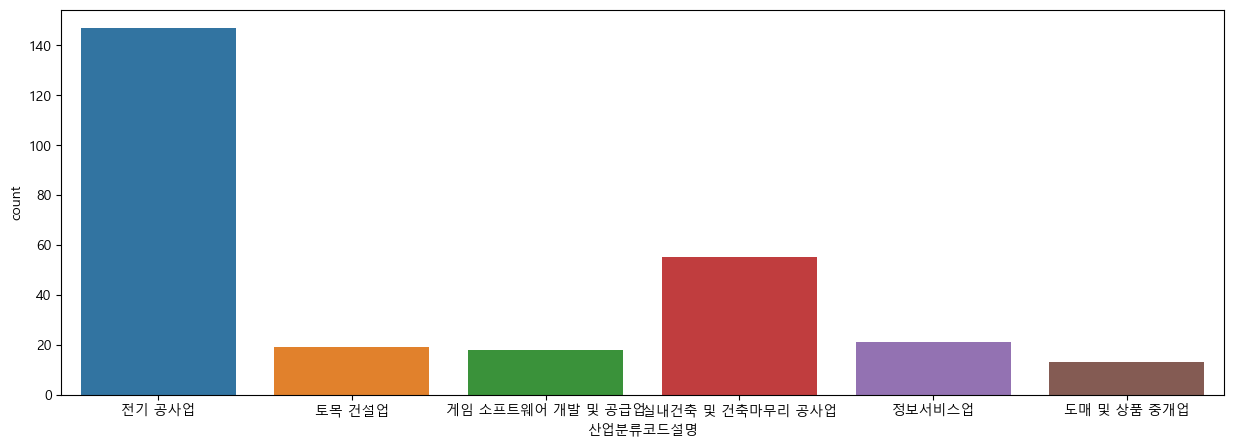

In [58]:
plt.figure(figsize = (15,5)) # 사이즈 조정
sns.countplot(data=df_m_reviews, x = '산업분류코드설명') # 각 분류별 리뷰 개수들

<AxesSubplot:xlabel='기업명', ylabel='count'>

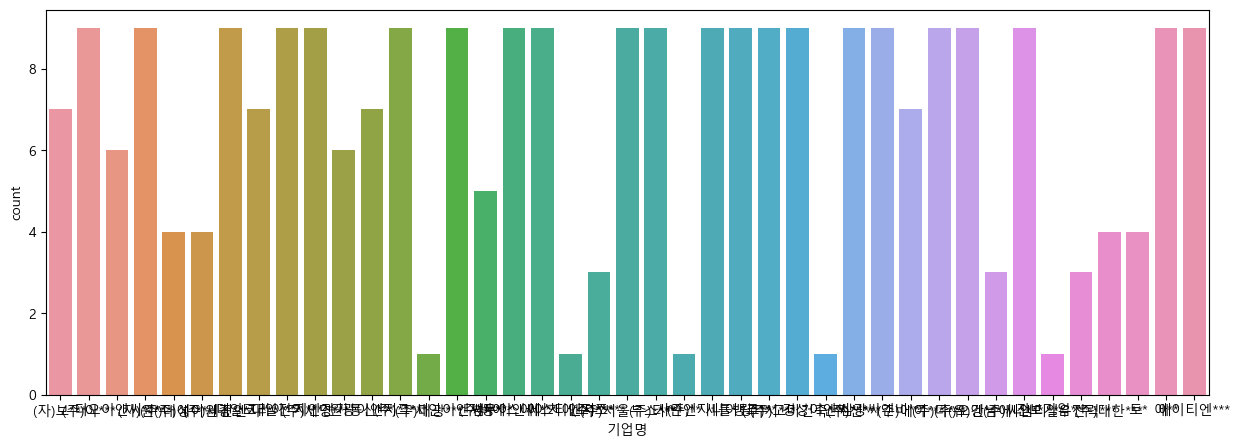

In [59]:
plt.figure(figsize = (15,5)) # 사이즈 조정
sns.countplot(data=df_m_reviews, x = '기업명') # 각 기업별 리뷰 개수들

In [60]:
df_m_reviews.columns

Index(['사업자등록번호', '기업명', '전화번호', '팩스전화번호', '주소', '상세주소', '기업형태', '기업규모',
       '공기업구분', '산업분류코드', '산업분류코드설명', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명'],
      dtype='object')

# 워드클라우드

In [61]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import konlpy as kp 
from konlpy.tag import Okt

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [62]:
okt = Okt()

In [63]:
pd.DataFrame( okt.pos(df_m_reviews['기업장점설명'].values.tolist()[0]), 
              columns=['형태소','품사'])

,형태소,품사
0,직원,Noun
1,들,Suffix
2,이,Josa
3,착함,Adjective
4,.,Punctuation
5,연중행사,Noun
6,등,Noun
7,직원,Noun
8,들,Suffix
9,의,Josa


In [64]:
# '기업장점설명'을 형태소 분석하여, '명사'에 대한 워드클라우드 생성

df1_POS = pd.DataFrame()
for i in range(0, len(df_m_reviews['기업장점설명']) ):
    df_n = pd.DataFrame(okt.pos(df_m_reviews['기업장점설명'].values.tolist()[i]) )
    df1_POS = pd.concat([df1_POS, df_n])
    
df1_POS1 = df1_POS.rename(columns={0:'형태소',1:'품사'})

In [65]:
df1_POS1['품사'].value_counts()

Noun              2745
Josa              1020
Verb               711
Adjective          657
Punctuation        380
Suffix             181
Foreign            166
Modifier            86
Adverb              79
Number              53
VerbPrefix          37
Determiner          20
Alpha               11
Conjunction          7
KoreanParticle       7
Exclamation          1
Name: 품사, dtype: int64

In [66]:
cond1 = (df1_POS1['품사']=='Noun')
df1_POS1.loc[cond1]

,형태소,품사
0,직원,Noun
5,연중행사,Noun
6,등,Noun
7,직원,Noun
10,단합,Noun
...,...,...
16,광화문,Noun
18,출퇴근,Noun
22,회식,Noun
23,강요,Noun


In [67]:
from wordcloud import WordCloud

df1_N = df1_POS1.loc[cond1]

In [68]:
wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(df1_N['형태소']) )

OSError: cannot open resource

In [ ]:
import matplotlib.pyplot as plt 

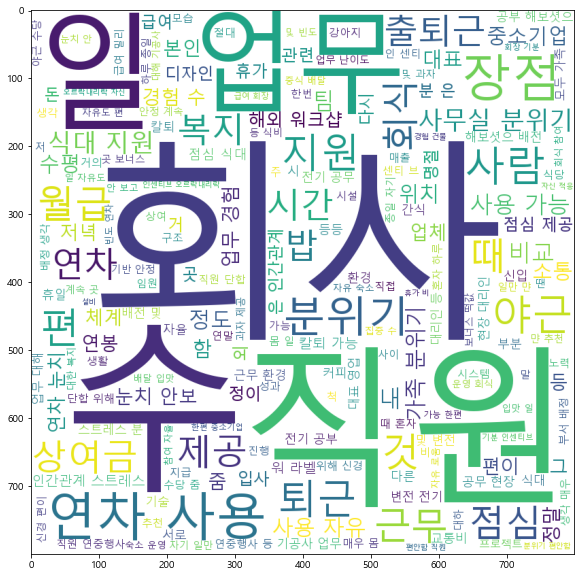

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wc_img)
plt.show()

In [ ]:
df_m_reviews.columns

Index(['사업자등록번호', '기업명', '전화번호', '팩스전화번호', '주소', '상세주소', '기업형태', '기업규모',
       '공기업구분', '산업분류코드', '산업분류코드설명', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명'],
      dtype='object')

In [ ]:
df_m_reviews['산업분류코드설명'].unique()

# 전기 공사업', '토목 건설업', '게임 소프트웨어 개발 및 공급업', '
# 실내건축 및 건축마무리 공사업','정보서비스업', '도매 및 상품 중개업

array(['전기 공사업', '토목 건설업', '게임 소프트웨어 개발 및 공급업', '실내건축 및 건축마무리 공사업',
       '정보서비스업', '도매 및 상품 중개업'], dtype=object)

In [ ]:
cond1 = (df_m_reviews['산업분류코드설명']=='전기 공사업')
cond2 = (df_m_reviews['산업분류코드설명']=='토목 건설업')
cond3 = (df_m_reviews['산업분류코드설명']=='게임 소프트웨어 개발 및 공급업')
cond4 = (df_m_reviews['산업분류코드설명']=='실내건축 및 건축마무리 공사업')
cond5 = (df_m_reviews['산업분류코드설명']=='정보서비스업')
cond6 = (df_m_reviews['산업분류코드설명']=='도매 및 상품 중개업')

# 산업분류 6개 추출한것

df10 = df_m_reviews.loc[cond1]
df20 = df_m_reviews.loc[cond2]
df30 = df_m_reviews.loc[cond3]
df40 = df_m_reviews.loc[cond4]
df50 = df_m_reviews.loc[cond5]
df60 = df_m_reviews.loc[cond6]

# 분류한거 확인
# df30['산업분류코드설명'].value_counts()

게임 소프트웨어 개발 및 공급업    18
Name: 산업분류코드설명, dtype: int64

# 기업별 워드클라우드 

In [ ]:
# 시리즈 -> 형태소 분석 
def pos_dataframe(data):
    okt = kp.tag.Okt()
    df_POS = pd.DataFrame()
    for i in range(0, len(data)):
        dfn = pd.DataFrame( okt.pos(data.values.tolist()[i]) )
        df_POS = pd.concat([df_POS, dfn])
    return df_POS.rename(columns={0:'형태소',1:'품사'})

In [ ]:
df_Pos = pos_dataframe(df10['기업장점설명'])
cond1 = (df_Pos['품사']=='Noun')
df_N  = df_Pos.loc[cond1]

In [ ]:
# 시각화 관련
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# 기업 장점 워드 클라우드 이미지

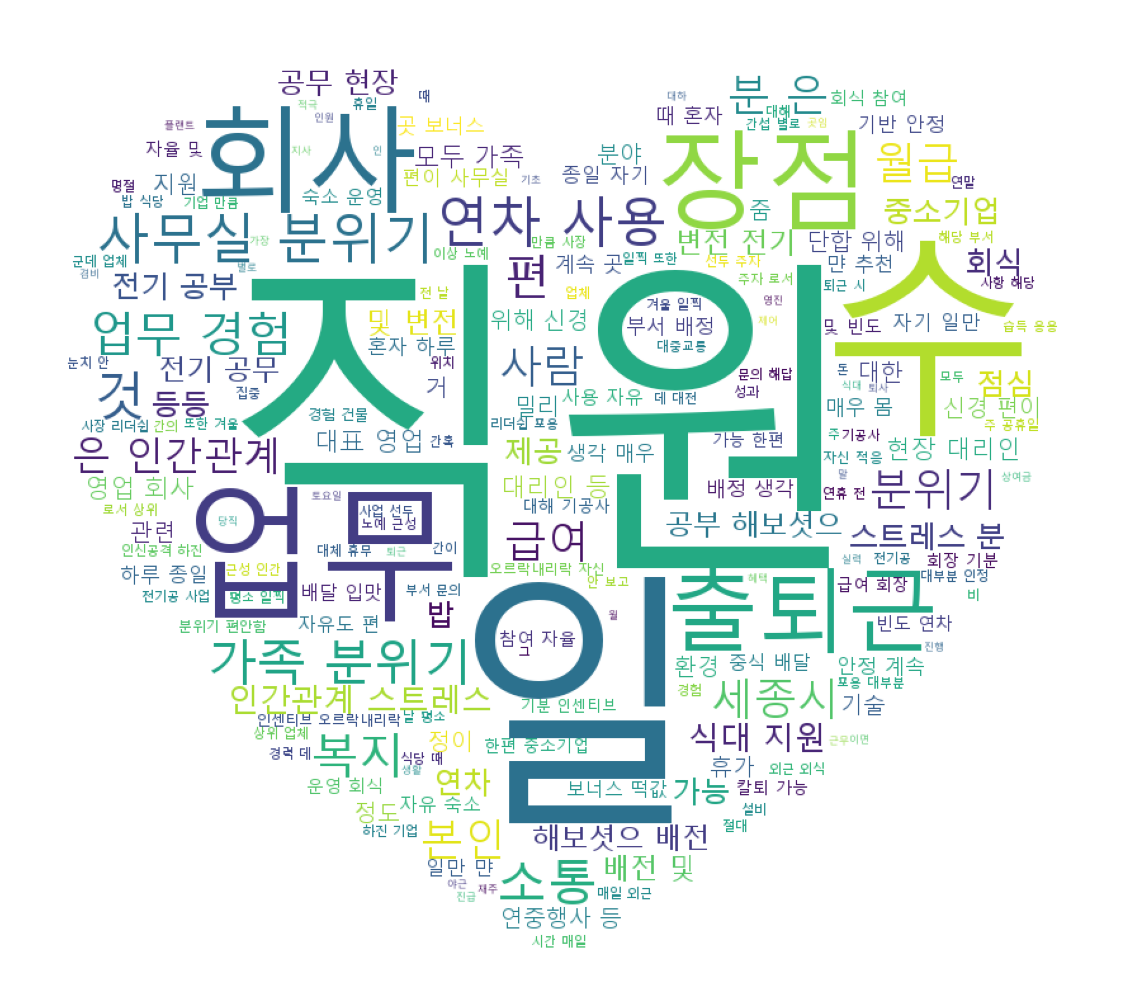

In [ ]:
from PIL import Image
import numpy as np
 
im = Image.open('love.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

# wordcloud = WordCloud(background_color ='white', colormap='autumn',
#                       width = 700, height = 700, random_state = 43, mask = mask_arr,
#                       prefer_horizontal = True).generate_from_frequencies(dic)

wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf', random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate(' '.join(df_N['형태소']))

plt.figure(figsize=[20,20])
plt.imshow(wc_img)


plt.axis('off')

plt.show()

# 기업 단점 워드 클라우드 이미지

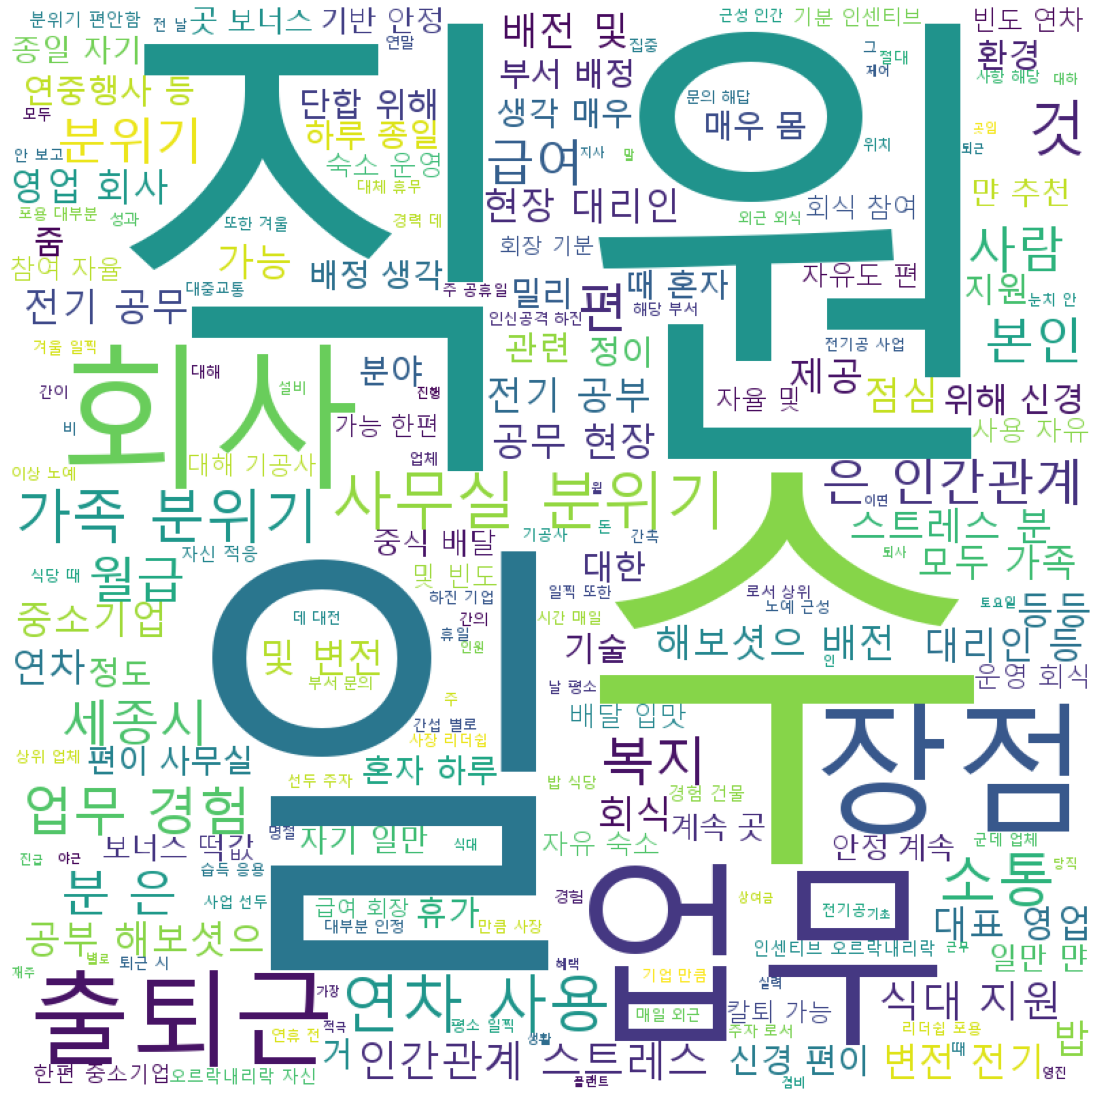

In [ ]:
from PIL import Image
import numpy as np
 
wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf', random_state = 43, 
                      prefer_horizontal = True).generate(' '.join(df_N['형태소']))

plt.figure(figsize=[20,20])
plt.imshow(wc_img)


plt.axis('off')

plt.show()

# 기업 취업사이트 댓글 제목 워드 클라우드 이미지

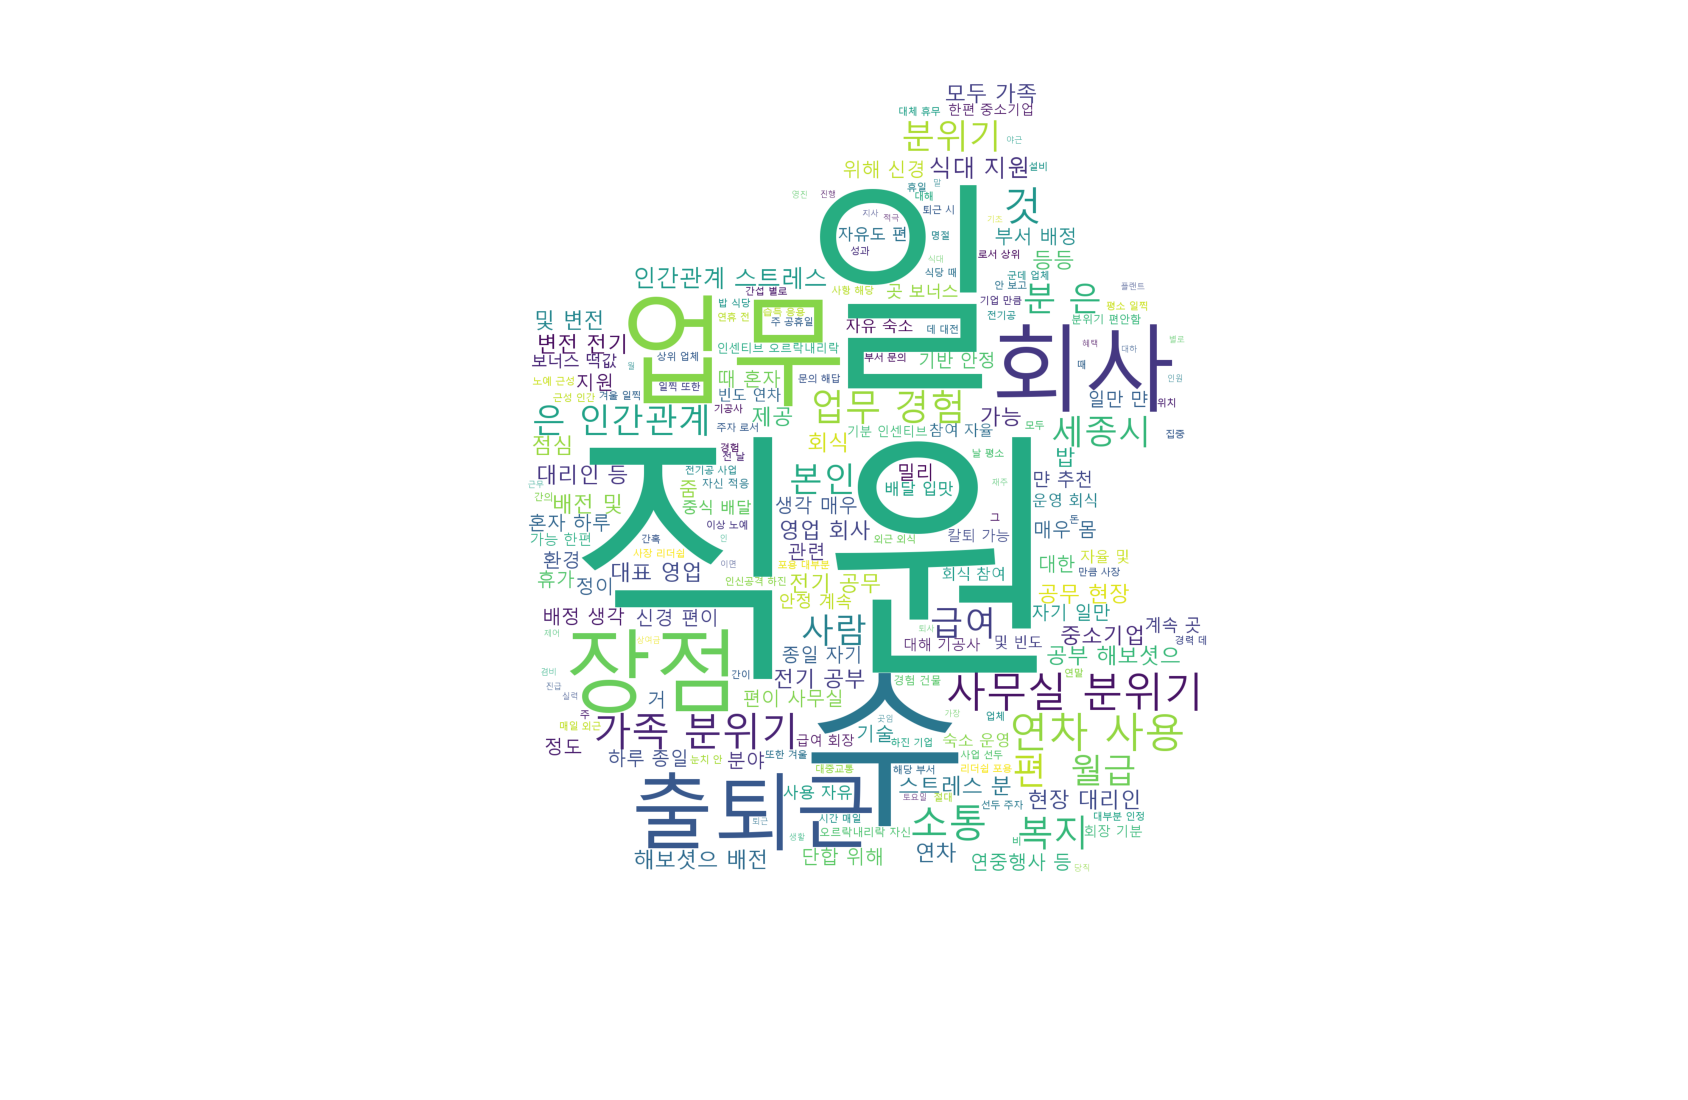

In [ ]:
from PIL import Image
import numpy as np
 
im = Image.open('apple.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

# wordcloud = WordCloud(background_color ='white', colormap='autumn',
#                       width = 700, height = 700, random_state = 43, mask = mask_arr,
#                       prefer_horizontal = True).generate_from_frequencies(dic)

wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf', random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate(' '.join(df_N['형태소']))

plt.figure(figsize=[30,30])
plt.imshow(wc_img)


plt.axis('off')

plt.show()